- #### Exercicis de Train-Test amb ScikitLearn a partir d'un dataset amb informació sobre les vivendes de Boston.

## Exercici 1

- #### Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

- #### També adjunt trobaràs una descripció de les diferents variables del dataset. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Llegeixo el dataframe
HousingBoston = pd.read_csv('/Users/angelssastrenadal/Downloads/housing_data.csv', header=None)
HousingBoston
# Veig que l'arxiu no te nom de columnes i agafa el primer registre com nom de columna, per tant he afegit , header=None

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
HousingBoston.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#Li assigno el nom de columnes segons info al .txt

In [4]:
HousingBoston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
HousingBoston.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Veig que hi han 506 registres i 14 variables/atributs, totes son numeriques Float64 a excepció de 2 que son int64

Attribute Information:

1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per 10000 dollars
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    Percentage lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's

In [6]:
HousingBoston.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.61,8.60,0.01,0.08,0.26,3.68,88.98
ZN,506.0,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.0,11.14,6.86,0.46,5.19,9.69,18.10,27.74
CHAS,506.0,0.07,0.25,0.00,0.00,0.00,0.00,1.00
NOX,506.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
RM,506.0,6.28,0.70,3.56,5.89,6.21,6.62,8.78
AGE,506.0,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.0,3.80,2.11,1.13,2.10,3.21,5.19,12.13
RAD,506.0,9.55,8.71,1.00,4.00,5.00,24.00,24.00
TAX,506.0,408.24,168.54,187.00,279.00,330.00,666.00,711.00


Informació que destaca:

- CRIM es compte amb un index entre 0,01 i 88,98 veiem que el 75% dels barris el rati de criminalitat es baixa, amb el 75% de la mostra amb menys de 3,68
-ZN Els terrenys de mes de 25000 peus cuadrats son el 11,36% de mitja
-RM La mitja d'habitacions es molt alta 6,28
-PTRATIO El nombre d'alumnes per professor es troba entre 12,6 i 22, em sembla baix
-B Em sorprén que tinguin en compte com indicador, la proporció de la població negre. 
-El valor mig de vivendes MEDV es troba entre 5000 i 50000
-**Variables categóriques:**
-El paràmetre CHAS(prop del riu Charles o no) es binari, per tant s'ha de tractar diferent a la resta:
"dummy variable (1 if tract bounds river; 0 otherwise)"
-També RAD "(index d'accés a autopistes radials)". 

Verifiquem si hi ha valors nuls o NaN, i duplicats:


In [7]:
nuls = HousingBoston.isna().values.any() | HousingBoston.isnull().values.any()
nuls

False

In [8]:
HousingBoston.duplicated().values.any()

False

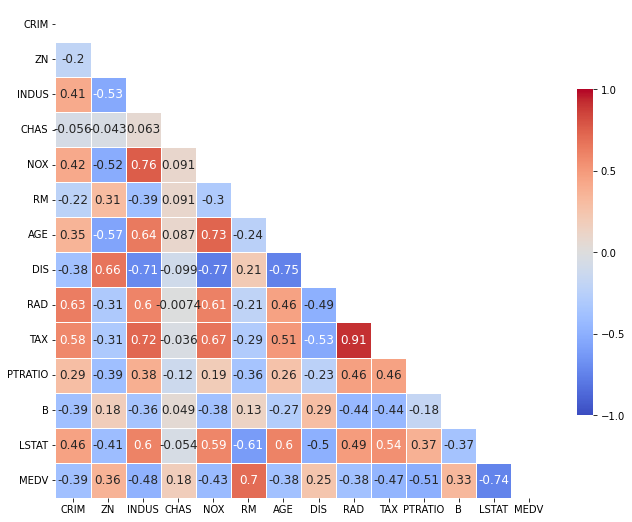

In [9]:
#Veiem la correlació entre variables 
f, ax = plt.subplots(figsize=(11, 15)) 
mask = np.triu(np.ones_like(HousingBoston.corr())) 
#Aquest mask np.triu treu el mirall (triangle idèntic) al heatmap
heatmap = sns.heatmap(HousingBoston.corr(method='pearson'), 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

#add the column names as labels
ax.set_yticklabels(HousingBoston.corr().columns, rotation = 0)
ax.set_xticklabels(HousingBoston.corr().columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

- RAD TAX Correlació positiva (a mes accés a les autopistes radials, mes valor impost propietat (ibi))
- DIS AGE Correlació negativa (a mes distància a les agencies d'ocupació , menys propietats antigues ocupades)
- DIS INDUS Correlació negativa (a mes distància a les agencies d'ocupació , menys botigues o serveis )
- DIS NOX Correlació negativa (a mes distància a les agencies d'ocupació , menys concentracio de NO2)
- MEDV LSTAT Correlació negativa (A mes valor mig, rati mes baix població pobre)
- MEDV RM Correlació positiva (A mes valor mig, mes nombre d'habitacions
*Algunes d'aquestes correlacions son evidents i no aporten valor, com a mes valor mes habitacions.
Pero trobaria interessant per exemple l'estudi de correlació MEDV a mes valor mig, PTRATIO menys rati d'estudiants
per professor o a mes valor mig, rati mes baix de població pobre.
                               

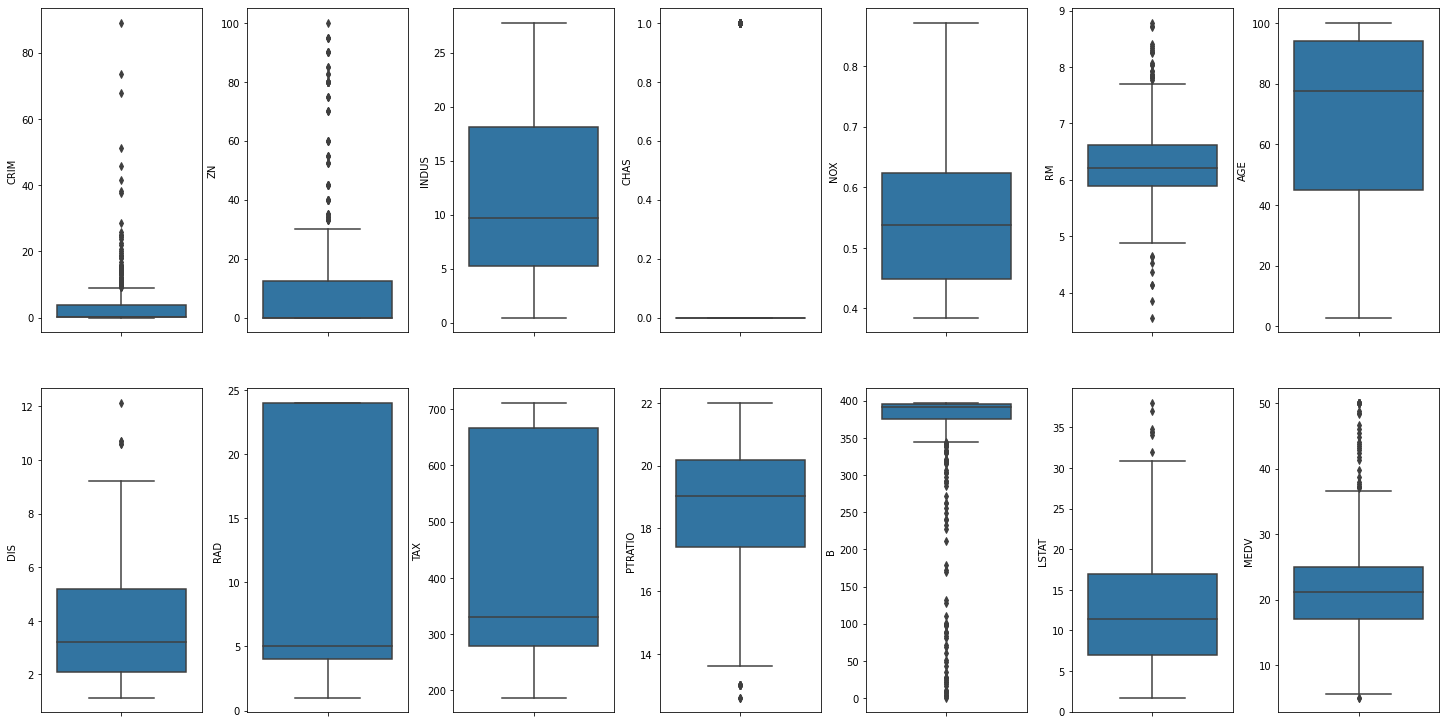

In [10]:
#Miro les distribucions gràfiques de les variables per decidir com son les variables distribuides, si son semblants, outliers,etc:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in HousingBoston.items():
    sns.boxplot(y=k, data=HousingBoston, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

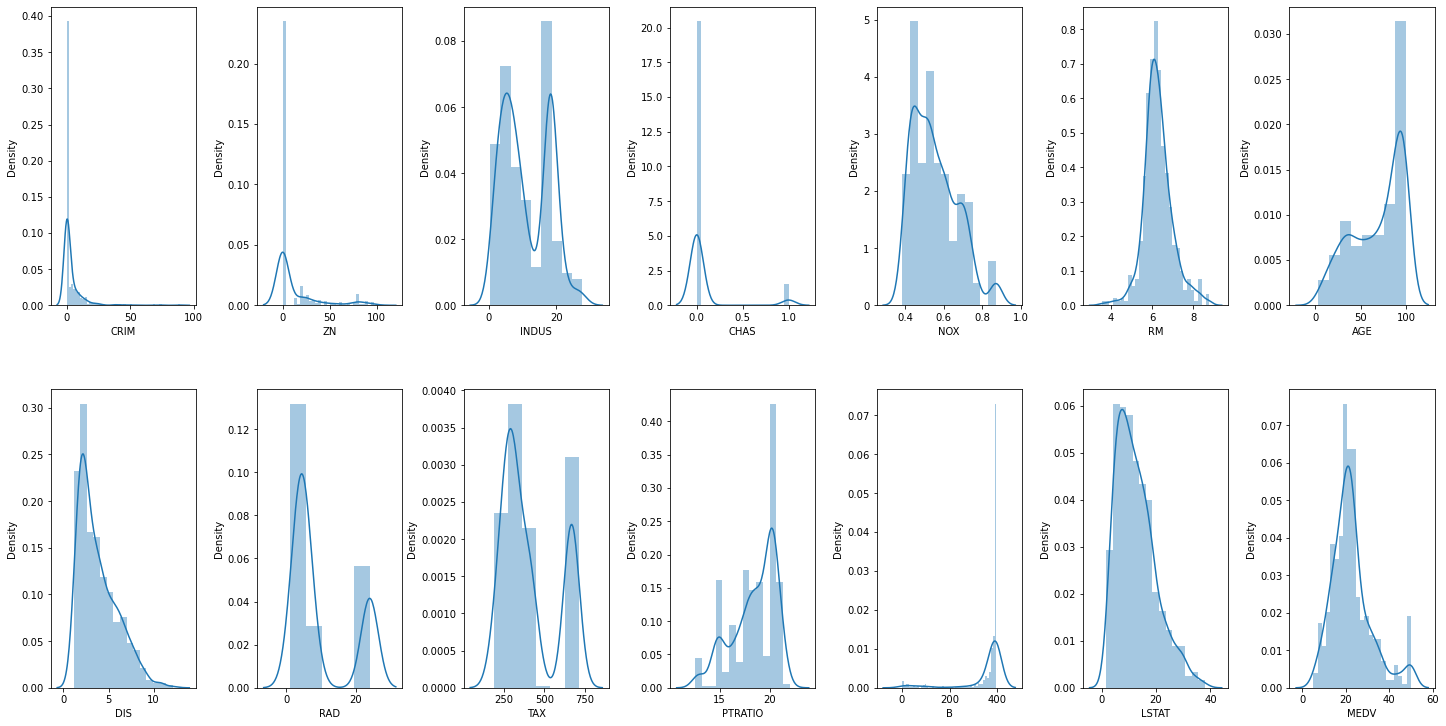

In [11]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in HousingBoston.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


Veiem que la majoria de distribucions NO són normals i algunes amb molts outliers com B,RM ZN,CRIM i algunes com B tenen distribucions molt asimetriques amb una dispersió mes gran, i algunes son bimodals con INDUS RAD i TAX.
MEDV sembla que es la que te la distribució mes semblant a la normal.
Algunes variables tenen distribució exponencial, com CRIM, ZN, AGE i B.

Faig la separació de les dades en train-test:

Escullo separar les dades en 80% pel train i 20% pel test i miraré si tenen una distribució semblant 
amb el train i amb el test. Fixaré el random amb random state=2 escullo 2 aleatoriament, per obtenir sempre aquesta mostre.



In [12]:

# Separo en train test sets posant com a Y la variable objectiu MEDV

X_train, X_test, y_train, y_test = train_test_split(HousingBoston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']], HousingBoston[['MEDV']], test_size=0.2, random_state=42)

y_train

,MEDV
477,12.0
15,19.9
332,19.4
423,13.4
19,18.2
...,...
106,19.5
270,21.1
348,24.5
435,13.4


Un cop realitzat el train-test split, divideixo cada conjunt de dades en dos subconjunts, 
un amb les variables numèriques i l'altre amb les variables categoriques (CHAS i RAD) i les grafico:

In [13]:
X_train_numeric = X_train.select_dtypes('float64')

In [14]:
X_test_numeric = X_test.select_dtypes('float64')

In [15]:
X_train_cat = X_train.select_dtypes('int64')

In [16]:
X_test_cat = X_test.select_dtypes('int64')

In [17]:
X_train_numeric.describe().round(2) 

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,3.61,11.57,10.99,0.56,6.32,68.56,3.81,404.03,18.32,356.28,12.46
std,8.88,23.15,6.89,0.12,0.71,27.99,2.13,166.17,2.23,91.57,7.11
min,0.01,0.00,0.74,0.38,3.86,2.90,1.13,187.00,12.60,0.32,1.73
25%,0.08,0.00,5.13,0.45,5.89,45.55,2.09,279.00,16.80,375.47,6.77
50%,0.26,0.00,8.56,0.54,6.21,77.70,3.18,330.00,18.70,391.30,10.92
75%,3.20,20.00,18.10,0.63,6.64,93.65,5.40,666.00,20.20,395.76,16.37
max,88.98,100.00,27.74,0.87,8.78,100.00,12.13,711.00,22.00,396.90,37.97


In [18]:
X_test_numeric.describe().round(2) 

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.0,102.00,102.00
mean,3.63,10.55,11.74,0.55,6.16,68.65,3.74,424.89,19.0,358.24,13.43
std,7.46,24.08,6.72,0.11,0.66,28.89,2.01,177.46,1.8,90.64,7.24
min,0.01,0.00,0.46,0.39,3.56,6.20,1.17,188.00,13.0,6.68,2.88
25%,0.09,0.00,6.10,0.45,5.87,43.80,2.26,281.75,18.4,375.02,7.69
50%,0.21,0.00,10.59,0.53,6.17,74.70,3.35,345.00,19.2,392.21,12.34
75%,4.52,0.00,18.10,0.62,6.48,95.22,4.76,666.00,20.2,396.90,18.02
max,45.75,95.00,27.74,0.87,8.03,100.00,10.71,711.00,22.0,396.90,36.98


In [19]:
X_train_cat.describe().round(2) 

,CHAS,RAD
count,404.00,404.00
mean,0.07,9.36
std,0.26,8.59
min,0.00,1.00
25%,0.00,4.00
50%,0.00,5.00
75%,0.00,12.00
max,1.00,24.00


In [20]:
X_test_cat.describe().round(2) 

,CHAS,RAD
count,102.00,102.00
mean,0.06,10.31
std,0.24,9.16
min,0.00,1.00
25%,0.00,4.00
50%,0.00,5.00
75%,0.00,24.00
max,1.00,24.00


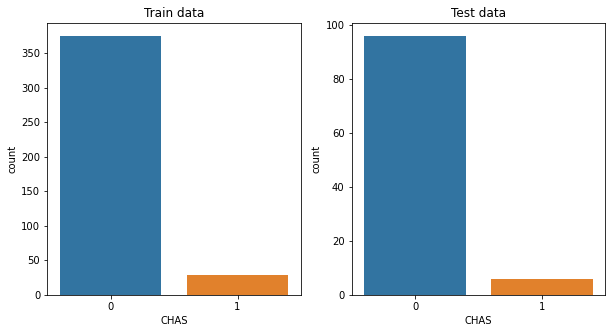

In [21]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
sns.countplot(x='CHAS', data=X_train_cat, ax=ax[0])
ax[0].set_title('Train data')
sns.countplot(x='CHAS', data=X_test_cat, ax=ax[1])
ax[1].set_title('Test data')
plt.show()

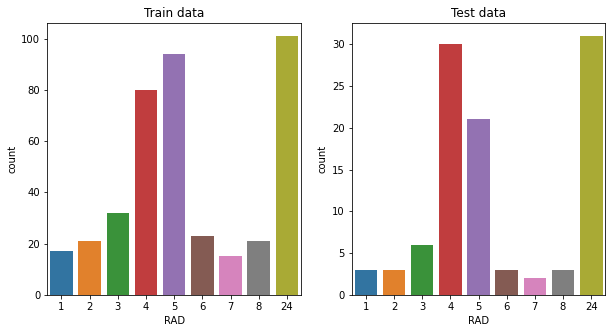

In [22]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
sns.countplot(x='RAD', data=X_train_cat, ax=ax[0])
ax[0].set_title('Train data')
sns.countplot(x='RAD', data=X_test_cat, ax=ax[1])
ax[1].set_title('Test data')
plt.show()

- Veig que les mostres son de 80% train i 20% test
- Miro ara com es distribueixen ambdues.
- Grafiquem el train i el test:

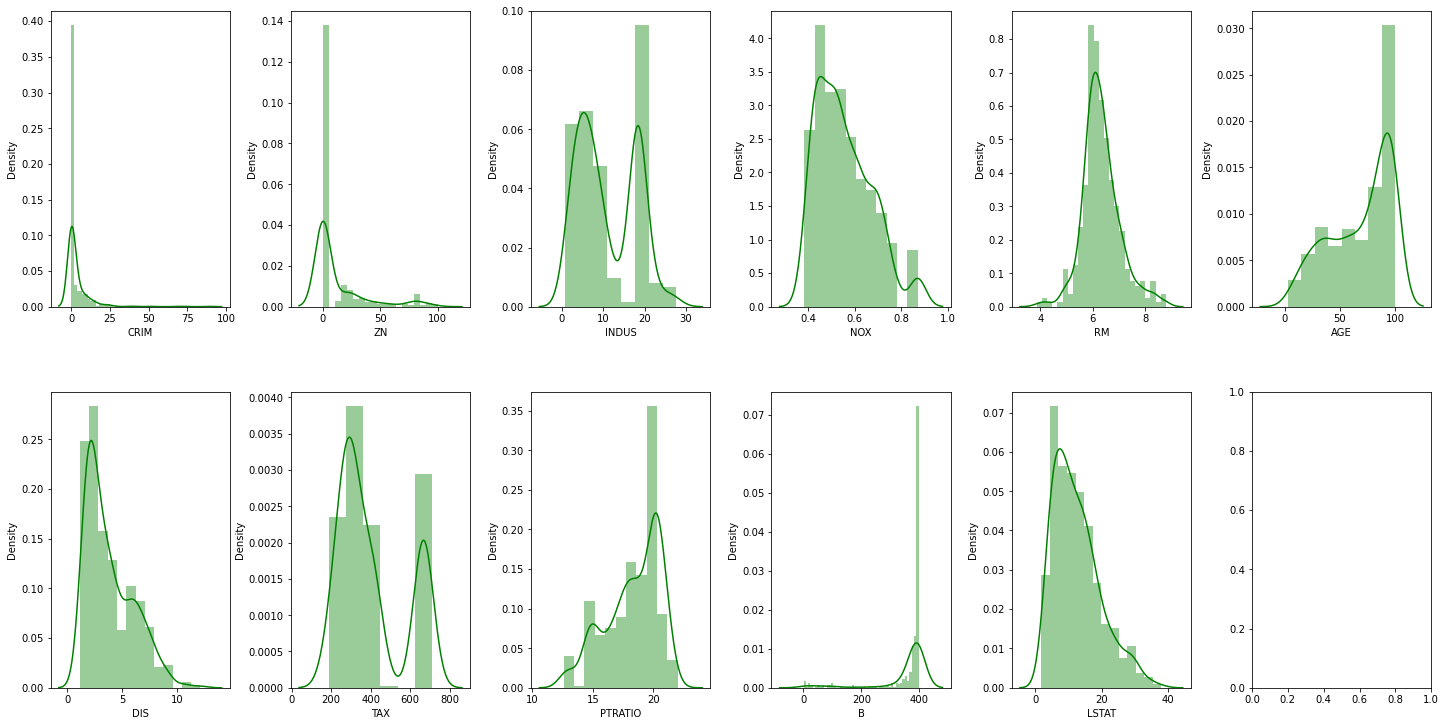

In [23]:
#Miro distribució en el train numéric
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0

axs = axs.flatten()

for k,v in X_train_numeric.items():
    sns.distplot(v, ax=axs[index], color='green')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


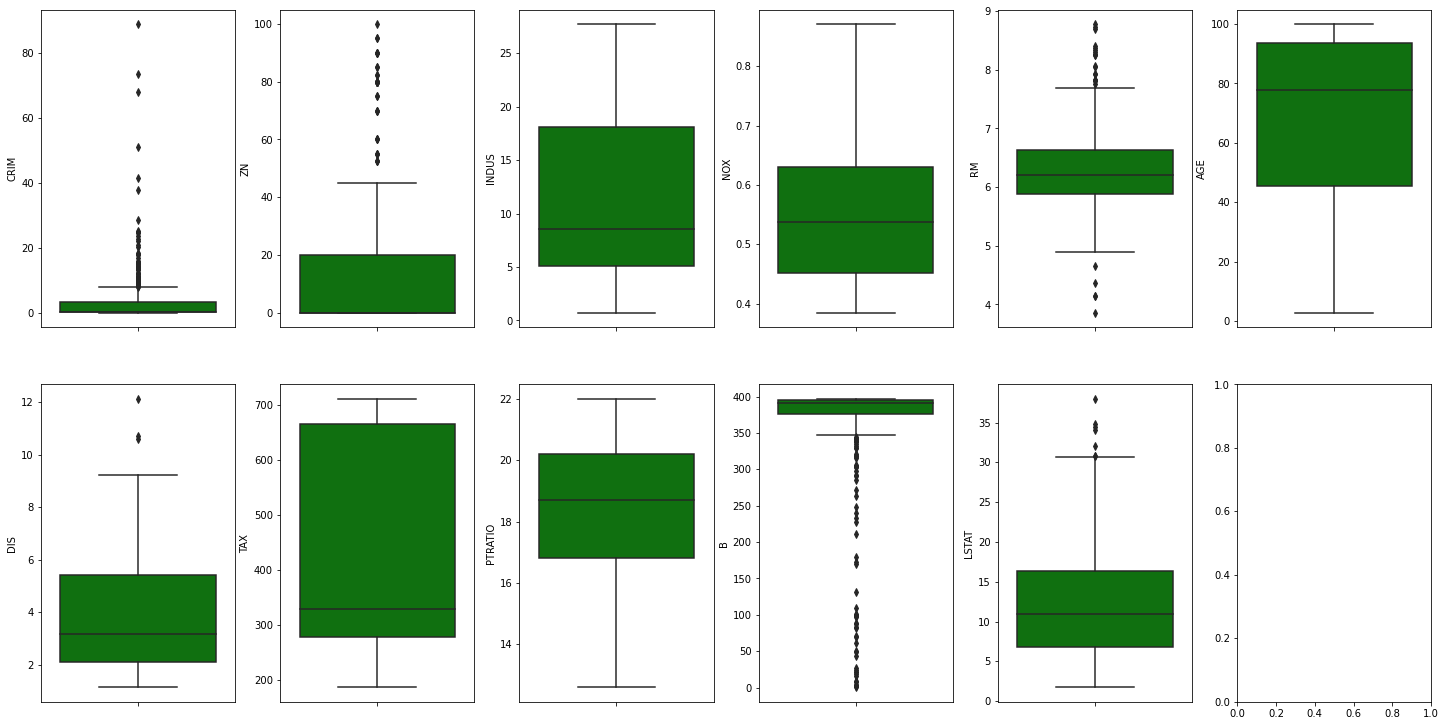

In [24]:
#Miro els outliers en el train numeric
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in X_train_numeric.items():
    sns.boxplot(y=k, data=X_train_numeric, ax=axs[index], color='green')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

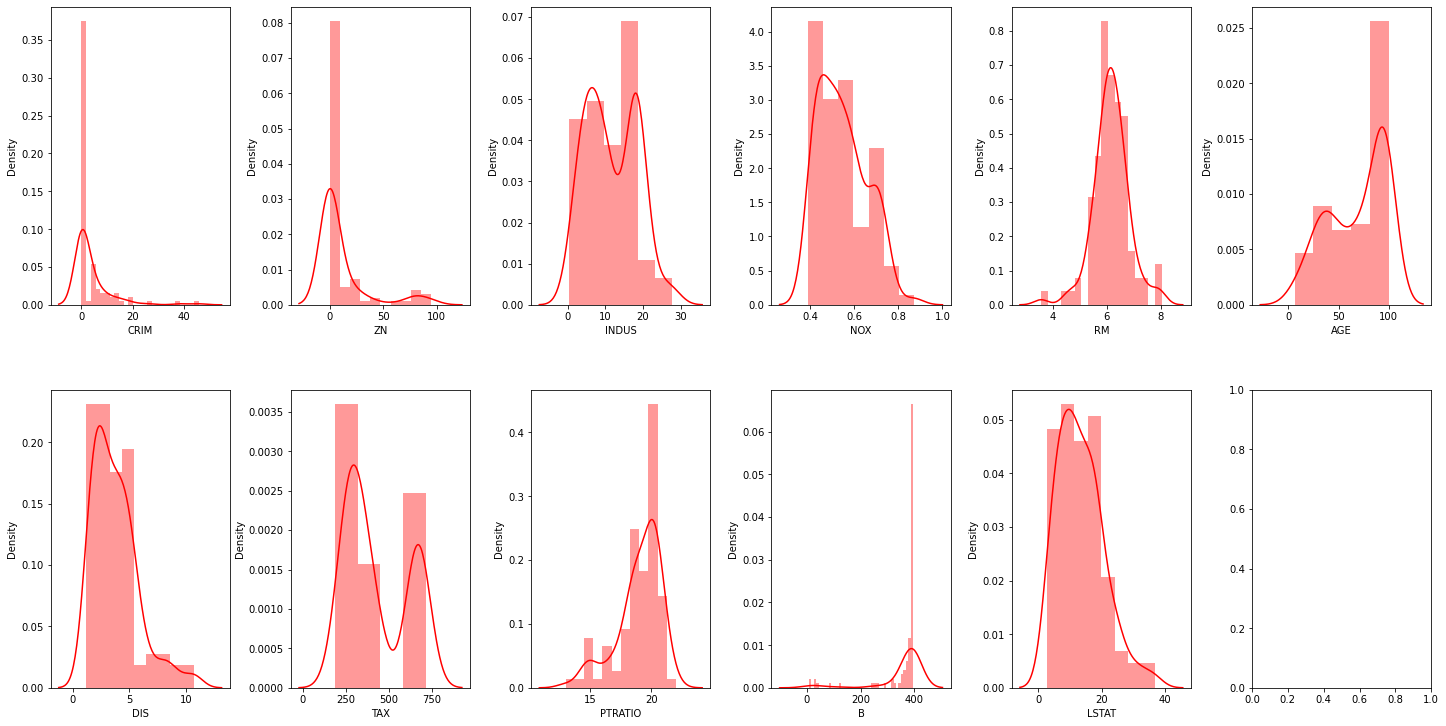

In [25]:
#Miro distribució en el test numéric
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
axs = axs.flatten()

for index, (k, v) in enumerate(X_test_numeric.items()):
    sns.distplot(v, ax=axs[index], color='red')
    axs[index].set_xlabel(k)  # Set the x-label as the key (k)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


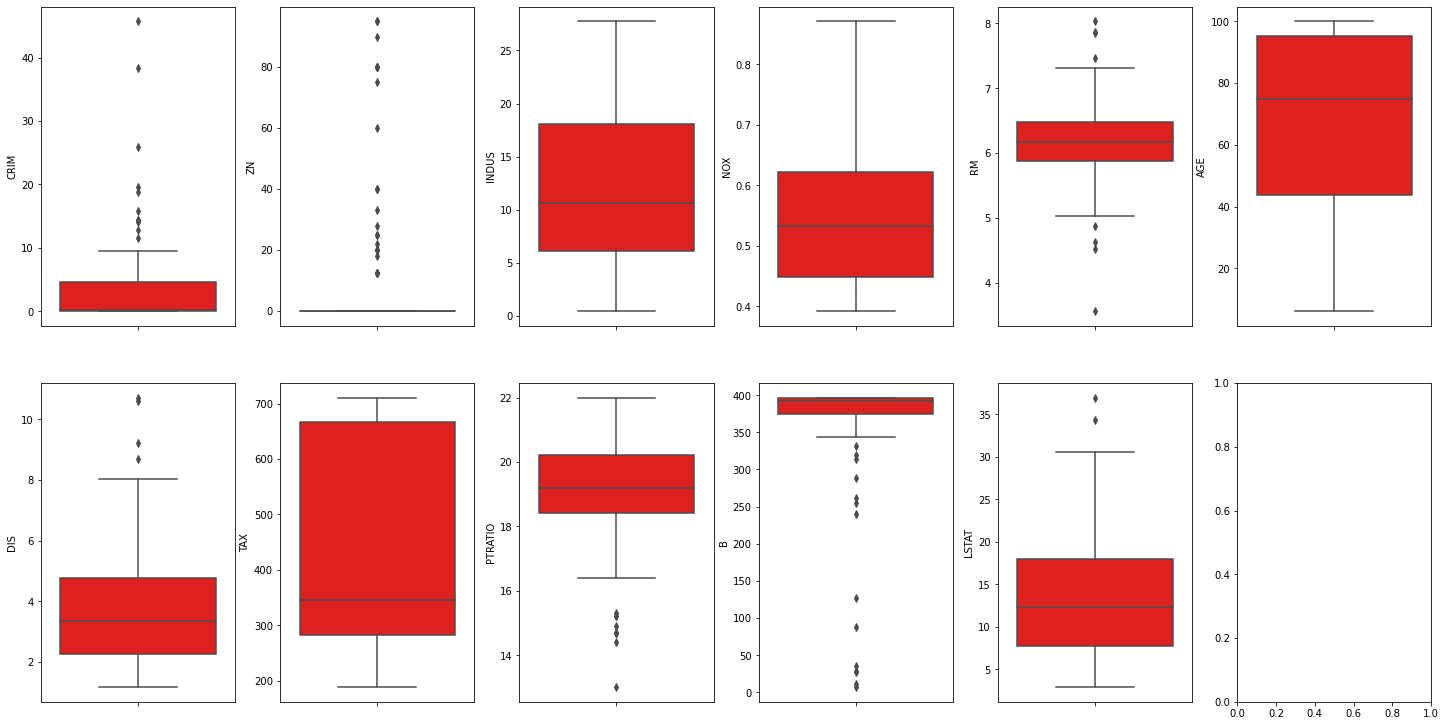

In [26]:
#Miro els outliers en el test numeric
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in X_test_numeric.items():
    sns.boxplot(y=k, data=X_test_numeric, ax=axs[index],color='red')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

- Veig que visualment els boxplots son també molt similars.
- En general com hi ha outliers a la majoria i no es distribueixen normalment,s'hauria d'aplicar un robust. Comprovo NOX,RM,DIS,PTRATIO,LSTAT i MEDV si es distribueixen normalment per assegurar-me'n

In [27]:
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.6f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

In [28]:
check_normality(X_train_numeric['NOX'])
check_normality(X_test_numeric['NOX'])
check_normality(X_train_numeric['RM'])
check_normality(X_test_numeric['RM'])
check_normality(X_train_numeric['DIS'])
check_normality(X_test_numeric['DIS'])
check_normality(X_train_numeric['PTRATIO'])
check_normality(X_test_numeric['PTRATIO'])
check_normality(X_train_numeric['LSTAT'])
check_normality(X_test_numeric['LSTAT'])
check_normality(y_train['MEDV'])
check_normality(y_test['MEDV'])

p value:0.000000
Reject null hypothesis >> The data is not normally distributed
p value:0.000122
Reject null hypothesis >> The data is not normally distributed
p value:0.000000
Reject null hypothesis >> The data is not normally distributed
p value:0.002626
Reject null hypothesis >> The data is not normally distributed
p value:0.000000
Reject null hypothesis >> The data is not normally distributed
p value:0.000000
Reject null hypothesis >> The data is not normally distributed
p value:0.000000
Reject null hypothesis >> The data is not normally distributed
p value:0.000000
Reject null hypothesis >> The data is not normally distributed
p value:0.000000
Reject null hypothesis >> The data is not normally distributed
p value:0.000561
Reject null hypothesis >> The data is not normally distributed
p value:0.000000
Reject null hypothesis >> The data is not normally distributed
p value:0.000000
Reject null hypothesis >> The data is not normally distributed


- Veiem que cap de les variables està normalment distribuida, comprovo les variances:

In [29]:
## Define a function to check variance
## For checking variance homogeneity, I preferred Levene’s test  
## but you can also check Bartlett’s test
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

In [30]:
check_variance_homogeneity(X_train['RM'],X_test['RM'])
check_variance_homogeneity(X_train['NOX'], X_test['NOX'])
check_variance_homogeneity(X_train['DIS'], X_test['DIS'])
check_variance_homogeneity(X_train['PTRATIO'], X_test['PTRATIO'])
check_variance_homogeneity(X_train['LSTAT'], X_test['LSTAT'])
check_variance_homogeneity(y_train['MEDV'], y_test['MEDV'])

p value:0.4401
Fail to reject null hypothesis >> The variances of the samples are same.
p value:0.5041
Fail to reject null hypothesis >> The variances of the samples are same.
p value:0.3036
Fail to reject null hypothesis >> The variances of the samples are same.
p value:0.0007
Reject null hypothesis >> The variances of the samples are different.
p value:0.7936
Fail to reject null hypothesis >> The variances of the samples are same.
p value:0.2275
Fail to reject null hypothesis >> The variances of the samples are same.


-En el cas de PTRATIO, tant la mostra de train com la de test no tenen una distribució no normal i tenen variances
diferents.
Per tant s'hauria de considerar la possibilitat que les dades en el conjunt d'entrenament de PTRATIO no són correctament representatius de la població.

## Exercici 2

- #### Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

El preprocessat de les dades normalment s'aplica al grup de train, pero al ser una bdd tant petita utilitzarem una 
còpia de la bdd global.

En el preprocessat podem fer el següent:

- A les Dades Normals o Gausianes  --> STANDARITZACIÓ

- A les No Normals o No Gaus: 

- Sense Outliers: NORMALITZACIO minmax

- Amb outliers:  Robust Scaler.
- Cicliques : Sinus cosinus
- Power Transform: Campanes desviades pero una mica semblants
- Polimorfisme: binomi (a+b)2
        

- Podem observar als boxplots histplots i proves en el exercici anterior al train_numeric que son NO normals i contenen:
*- Outliers:'CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT' i 'MEDV' li apliquem Robust Scaler, excepte MEDV que es el nostre target.
*- NO outliers: 'INDUS', 'NOX', 'AGE' i 'TAX' li podem aplicar MinMaxScaler.
- Per variables binàries, no cal fer res de especial, ja que només poden prendre dos valors: 0 o 1. 

In [31]:
#Faig una copia de la bdd per tenir un dataframe amb les transformacions
HousingBoston_transf=HousingBoston.copy()


In [32]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
columnsRobust = ['CRIM','ZN','RM','DIS','PTRATIO','B','LSTAT','MEDV']
scaler = preprocessing.RobustScaler().fit(HousingBoston_transf[columnsRobust])
HousingBoston_transf[columnsRobust] = scaler.transform(HousingBoston_transf[columnsRobust])
HousingBoston_transf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.069593,1.44,2.31,0,0.538,0.496612,65.2,0.285777,1,296.0,-1.339286,0.261902,-0.637681,0.351097
1,-0.063755,0.00,7.07,0,0.469,0.287940,78.9,0.569789,2,242.0,-0.446429,0.261902,-0.221889,0.050157
2,-0.063760,0.00,7.07,0,0.469,1.323171,61.1,0.569789,2,242.0,-0.446429,0.066675,-0.732634,1.692790
3,-0.062347,0.00,2.18,0,0.458,1.069783,45.8,0.924391,3,222.0,-0.125000,0.153016,-0.841579,1.529781
4,-0.052144,0.00,2.18,0,0.458,1.271680,54.2,0.924391,3,222.0,-0.125000,0.261902,-0.602699,1.880878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,11.93,0,0.573,0.521003,69.1,-0.236007,1,273.0,0.696429,0.026382,-0.168916,0.150470
502,-0.058759,0.00,11.93,0,0.573,-0.119919,76.7,-0.297887,1,273.0,0.696429,0.261902,-0.227886,-0.075235
503,-0.054450,0.00,11.93,0,0.573,1.039973,91.0,-0.336744,1,273.0,0.696429,0.261902,-0.571714,0.338558
504,-0.040867,0.00,11.93,0,0.573,0.793360,89.3,-0.265053,1,273.0,0.696429,0.096414,-0.487756,0.100313


In [33]:
from sklearn.preprocessing import MinMaxScaler
columnsminmax = ['INDUS', 'NOX', 'TAX', 'AGE']
trans = MinMaxScaler()
HousingBoston_transf[columnsminmax] = trans.fit_transform(HousingBoston_transf[columnsminmax])
HousingBoston_transf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.069593,1.44,0.067815,0,0.314815,0.496612,0.641607,0.285777,1,0.208015,-1.339286,0.261902,-0.637681,0.351097
1,-0.063755,0.00,0.242302,0,0.172840,0.287940,0.782698,0.569789,2,0.104962,-0.446429,0.261902,-0.221889,0.050157
2,-0.063760,0.00,0.242302,0,0.172840,1.323171,0.599382,0.569789,2,0.104962,-0.446429,0.066675,-0.732634,1.692790
3,-0.062347,0.00,0.063050,0,0.150206,1.069783,0.441813,0.924391,3,0.066794,-0.125000,0.153016,-0.841579,1.529781
4,-0.052144,0.00,0.063050,0,0.150206,1.271680,0.528321,0.924391,3,0.066794,-0.125000,0.261902,-0.602699,1.880878


In [34]:
HousingBoston_transf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.069593,1.44,0.067815,0,0.314815,0.496612,0.641607,0.285777,1,0.208015,-1.339286,0.261902,-0.637681,0.351097
1,-0.063755,0.00,0.242302,0,0.172840,0.287940,0.782698,0.569789,2,0.104962,-0.446429,0.261902,-0.221889,0.050157
2,-0.063760,0.00,0.242302,0,0.172840,1.323171,0.599382,0.569789,2,0.104962,-0.446429,0.066675,-0.732634,1.692790
3,-0.062347,0.00,0.063050,0,0.150206,1.069783,0.441813,0.924391,3,0.066794,-0.125000,0.153016,-0.841579,1.529781
4,-0.052144,0.00,0.063050,0,0.150206,1.271680,0.528321,0.924391,3,0.066794,-0.125000,0.261902,-0.602699,1.880878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.420455,0,0.386831,0.521003,0.681771,-0.236007,1,0.164122,0.696429,0.026382,-0.168916,0.150470
502,-0.058759,0.00,0.420455,0,0.386831,-0.119919,0.760041,-0.297887,1,0.164122,0.696429,0.261902,-0.227886,-0.075235
503,-0.054450,0.00,0.420455,0,0.386831,1.039973,0.907312,-0.336744,1,0.164122,0.696429,0.261902,-0.571714,0.338558
504,-0.040867,0.00,0.420455,0,0.386831,0.793360,0.889804,-0.265053,1,0.164122,0.696429,0.096414,-0.487756,0.100313


Per crear dummies, miro els valors de RAD i CHAS,veig que un es binari i l'altre es categoric:

In [35]:
str(HousingBoston_transf.CHAS.unique())

'[0 1]'

In [36]:
str(HousingBoston_transf.RAD.unique())

'[ 1  2  3  5  4  8  6  7 24]'

In [37]:

#Creo columnes dummies per la columna RAD
HousingBoston_transf = pd.get_dummies(data = HousingBoston_transf, columns= ['RAD'])
HousingBoston_transf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,-0.069593,1.44,0.067815,0,0.314815,0.496612,0.641607,0.285777,0.208015,-1.339286,...,0.351097,1,0,0,0,0,0,0,0,0
1,-0.063755,0.00,0.242302,0,0.172840,0.287940,0.782698,0.569789,0.104962,-0.446429,...,0.050157,0,1,0,0,0,0,0,0,0
2,-0.063760,0.00,0.242302,0,0.172840,1.323171,0.599382,0.569789,0.104962,-0.446429,...,1.692790,0,1,0,0,0,0,0,0,0
3,-0.062347,0.00,0.063050,0,0.150206,1.069783,0.441813,0.924391,0.066794,-0.125000,...,1.529781,0,0,1,0,0,0,0,0,0
4,-0.052144,0.00,0.063050,0,0.150206,1.271680,0.528321,0.924391,0.066794,-0.125000,...,1.880878,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.420455,0,0.386831,0.521003,0.681771,-0.236007,0.164122,0.696429,...,0.150470,1,0,0,0,0,0,0,0,0
502,-0.058759,0.00,0.420455,0,0.386831,-0.119919,0.760041,-0.297887,0.164122,0.696429,...,-0.075235,1,0,0,0,0,0,0,0,0
503,-0.054450,0.00,0.420455,0,0.386831,1.039973,0.907312,-0.336744,0.164122,0.696429,...,0.338558,1,0,0,0,0,0,0,0,0
504,-0.040867,0.00,0.420455,0,0.386831,0.793360,0.889804,-0.265053,0.164122,0.696429,...,0.100313,1,0,0,0,0,0,0,0,0


In [38]:
# Transformació de la variable "CHAS" en variables dummies
HousingBoston_transf = pd.get_dummies(data = HousingBoston_transf, columns= ['CHAS'])
pd.set_option('display.max_columns', None)
HousingBoston_transf

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24,CHAS_0,CHAS_1
0,-0.069593,1.44,0.067815,0.314815,0.496612,0.641607,0.285777,0.208015,-1.339286,0.261902,-0.637681,0.351097,1,0,0,0,0,0,0,0,0,1,0
1,-0.063755,0.00,0.242302,0.172840,0.287940,0.782698,0.569789,0.104962,-0.446429,0.261902,-0.221889,0.050157,0,1,0,0,0,0,0,0,0,1,0
2,-0.063760,0.00,0.242302,0.172840,1.323171,0.599382,0.569789,0.104962,-0.446429,0.066675,-0.732634,1.692790,0,1,0,0,0,0,0,0,0,1,0
3,-0.062347,0.00,0.063050,0.150206,1.069783,0.441813,0.924391,0.066794,-0.125000,0.153016,-0.841579,1.529781,0,0,1,0,0,0,0,0,0,1,0
4,-0.052144,0.00,0.063050,0.150206,1.271680,0.528321,0.924391,0.066794,-0.125000,0.261902,-0.602699,1.880878,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.420455,0.386831,0.521003,0.681771,-0.236007,0.164122,0.696429,0.026382,-0.168916,0.150470,1,0,0,0,0,0,0,0,0,1,0
502,-0.058759,0.00,0.420455,0.386831,-0.119919,0.760041,-0.297887,0.164122,0.696429,0.261902,-0.227886,-0.075235,1,0,0,0,0,0,0,0,0,1,0
503,-0.054450,0.00,0.420455,0.386831,1.039973,0.907312,-0.336744,0.164122,0.696429,0.261902,-0.571714,0.338558,1,0,0,0,0,0,0,0,0,1,0
504,-0.040867,0.00,0.420455,0.386831,0.793360,0.889804,-0.265053,0.164122,0.696429,0.096414,-0.487756,0.100313,1,0,0,0,0,0,0,0,0,1,0


La variable "TAX" podria tenir una relació no-lineal amb la variable objectiu "MEDV". 
Per exemple, podria ser que el creixement dels valor mig de vivenda ocupada no fos lineal amb el que es paga de Impost per vivenda,per el que creo una variable polinomi

In [45]:

poly = PolynomialFeatures(degree=2, include_bias=False)
HousingBoston_TAX_poly = poly.fit_transform(HousingBoston_transf[['TAX']])

HousingBoston_TAX_poly = pd.DataFrame(HousingBoston_TAX_poly, columns=['poliTAX', 'poliTAX^2'])


# Combinem totes les dades processades

HousingBoston_transf_final = pd.concat([HousingBoston_transf, HousingBoston_TAX_poly], axis=1)

HousingBoston_transf_final


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24,CHAS_0,CHAS_1,poliTAX,poliTAX^2
0,-0.069593,1.44,0.067815,0.314815,0.496612,0.641607,0.285777,0.208015,-1.339286,0.261902,-0.637681,0.351097,1,0,0,0,0,0,0,0,0,1,0,0.208015,0.043270
1,-0.063755,0.00,0.242302,0.172840,0.287940,0.782698,0.569789,0.104962,-0.446429,0.261902,-0.221889,0.050157,0,1,0,0,0,0,0,0,0,1,0,0.104962,0.011017
2,-0.063760,0.00,0.242302,0.172840,1.323171,0.599382,0.569789,0.104962,-0.446429,0.066675,-0.732634,1.692790,0,1,0,0,0,0,0,0,0,1,0,0.104962,0.011017
3,-0.062347,0.00,0.063050,0.150206,1.069783,0.441813,0.924391,0.066794,-0.125000,0.153016,-0.841579,1.529781,0,0,1,0,0,0,0,0,0,1,0,0.066794,0.004461
4,-0.052144,0.00,0.063050,0.150206,1.271680,0.528321,0.924391,0.066794,-0.125000,0.261902,-0.602699,1.880878,0,0,1,0,0,0,0,0,0,1,0,0.066794,0.004461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.420455,0.386831,0.521003,0.681771,-0.236007,0.164122,0.696429,0.026382,-0.168916,0.150470,1,0,0,0,0,0,0,0,0,1,0,0.164122,0.026936
502,-0.058759,0.00,0.420455,0.386831,-0.119919,0.760041,-0.297887,0.164122,0.696429,0.261902,-0.227886,-0.075235,1,0,0,0,0,0,0,0,0,1,0,0.164122,0.026936
503,-0.054450,0.00,0.420455,0.386831,1.039973,0.907312,-0.336744,0.164122,0.696429,0.261902,-0.571714,0.338558,1,0,0,0,0,0,0,0,0,1,0,0.164122,0.026936
504,-0.040867,0.00,0.420455,0.386831,0.793360,0.889804,-0.265053,0.164122,0.696429,0.096414,-0.487756,0.100313,1,0,0,0,0,0,0,0,0,1,0,0.164122,0.026936


## Exercici 3

- #### Resumeix les noves columnes generades de manera estadística i gràfica


In [46]:
HousingBoston_transf_final.info() #Mirem de nou les variables creades

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   NOX        506 non-null    float64
 4   RM         506 non-null    float64
 5   AGE        506 non-null    float64
 6   DIS        506 non-null    float64
 7   TAX        506 non-null    float64
 8   PTRATIO    506 non-null    float64
 9   B          506 non-null    float64
 10  LSTAT      506 non-null    float64
 11  MEDV       506 non-null    float64
 12  RAD_1      506 non-null    uint8  
 13  RAD_2      506 non-null    uint8  
 14  RAD_3      506 non-null    uint8  
 15  RAD_4      506 non-null    uint8  
 16  RAD_5      506 non-null    uint8  
 17  RAD_6      506 non-null    uint8  
 18  RAD_7      506 non-null    uint8  
 19  RAD_8      506 non-null    uint8  
 20  RAD_24    

In [47]:
HousingBoston_transf_final.select_dtypes(include=['float64']).describe().round(3)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV,poliTAX,poliTAX^2
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,0.934,0.909,0.391,0.349,0.103,0.676,0.190,0.422,-0.212,-1.668,0.129,0.167,0.422,0.282
std,2.393,1.866,0.251,0.238,0.952,0.290,0.682,0.322,0.773,4.379,0.714,1.153,0.322,0.347
min,-0.070,0.000,0.000,0.000,-3.587,0.000,-0.673,0.000,-2.304,-18.761,-0.963,-2.031,0.000,0.000
25%,-0.049,0.000,0.173,0.132,-0.438,0.434,-0.359,0.176,-0.589,-0.770,-0.441,-0.524,0.176,0.031
50%,-0.000,0.000,0.338,0.315,0.000,0.768,0.000,0.273,0.000,0.000,0.000,0.000,0.273,0.074
75%,0.951,1.000,0.647,0.492,0.562,0.939,0.641,0.914,0.411,0.230,0.559,0.476,0.914,0.836
max,24.678,8.000,1.000,1.000,3.484,1.000,2.888,1.000,1.054,0.262,2.660,3.611,1.000,1.000


Observem que ara els valors son mes propers si ho comprarem amb la bbdd no transformada, per exemple les mitges estàn ara entre -1 i 1

In [48]:
# Defineixo la columna Target, que ja hem vist que es MEDV
target_data = HousingBoston_transf_final['MEDV']
HousingBoston_transf_final['Target'] = target_data #li poso el nom target
HousingBoston_transf_final.drop(['MEDV'], axis = 1, inplace = True) #l'elimino ja que l'he substituida per Target
HousingBoston_transf_final

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24,CHAS_0,CHAS_1,poliTAX,poliTAX^2,Target
0,-0.069593,1.44,0.067815,0.314815,0.496612,0.641607,0.285777,0.208015,-1.339286,0.261902,-0.637681,1,0,0,0,0,0,0,0,0,1,0,0.208015,0.043270,0.351097
1,-0.063755,0.00,0.242302,0.172840,0.287940,0.782698,0.569789,0.104962,-0.446429,0.261902,-0.221889,0,1,0,0,0,0,0,0,0,1,0,0.104962,0.011017,0.050157
2,-0.063760,0.00,0.242302,0.172840,1.323171,0.599382,0.569789,0.104962,-0.446429,0.066675,-0.732634,0,1,0,0,0,0,0,0,0,1,0,0.104962,0.011017,1.692790
3,-0.062347,0.00,0.063050,0.150206,1.069783,0.441813,0.924391,0.066794,-0.125000,0.153016,-0.841579,0,0,1,0,0,0,0,0,0,1,0,0.066794,0.004461,1.529781
4,-0.052144,0.00,0.063050,0.150206,1.271680,0.528321,0.924391,0.066794,-0.125000,0.261902,-0.602699,0,0,1,0,0,0,0,0,0,1,0,0.066794,0.004461,1.880878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.420455,0.386831,0.521003,0.681771,-0.236007,0.164122,0.696429,0.026382,-0.168916,1,0,0,0,0,0,0,0,0,1,0,0.164122,0.026936,0.150470
502,-0.058759,0.00,0.420455,0.386831,-0.119919,0.760041,-0.297887,0.164122,0.696429,0.261902,-0.227886,1,0,0,0,0,0,0,0,0,1,0,0.164122,0.026936,-0.075235
503,-0.054450,0.00,0.420455,0.386831,1.039973,0.907312,-0.336744,0.164122,0.696429,0.261902,-0.571714,1,0,0,0,0,0,0,0,0,1,0,0.164122,0.026936,0.338558
504,-0.040867,0.00,0.420455,0.386831,0.793360,0.889804,-0.265053,0.164122,0.696429,0.096414,-0.487756,1,0,0,0,0,0,0,0,0,1,0,0.164122,0.026936,0.100313


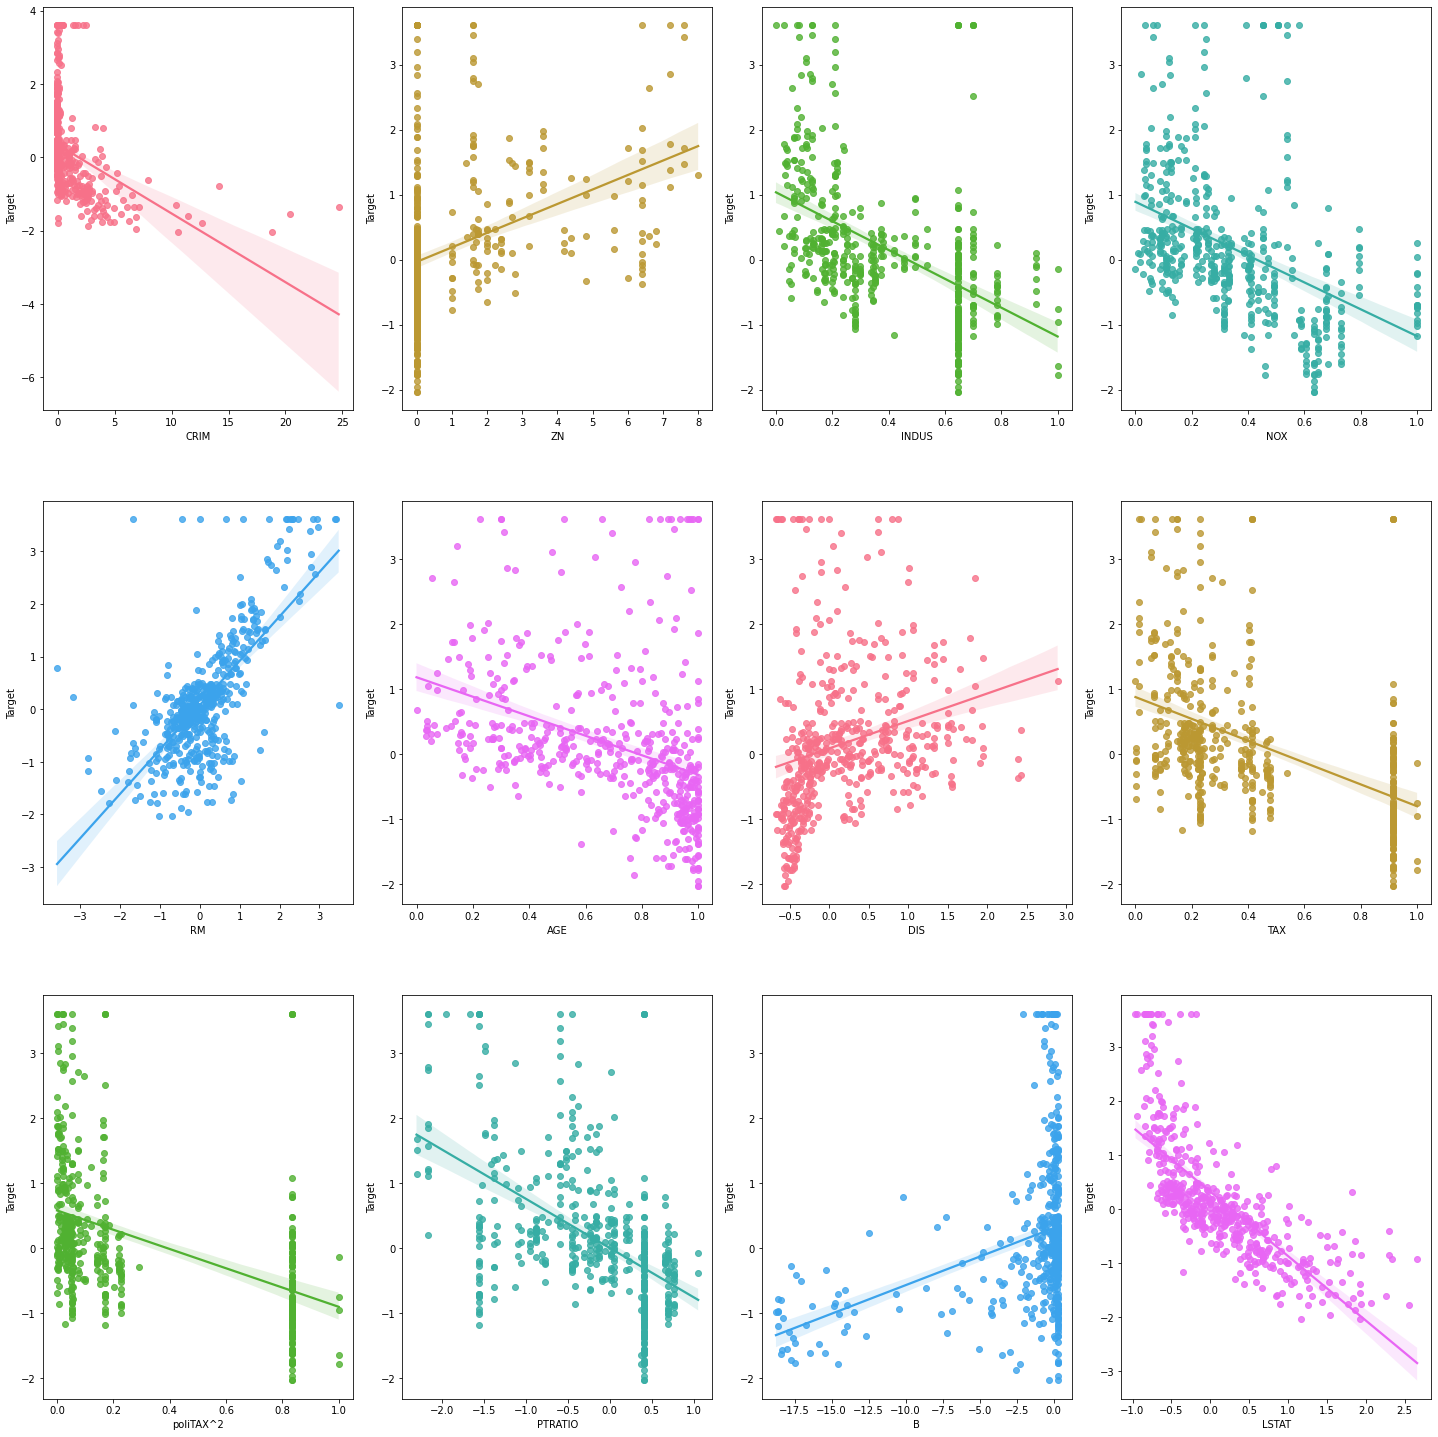

In [50]:
column_sels = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX','poliTAX^2','PTRATIO' ,'B', 'LSTAT']
x = HousingBoston_transf_final.loc[:, column_sels]
y = HousingBoston_transf_final['Target']

fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(20, 20))
axs = axs.flatten()

for i, k in enumerate(column_sels):
    color_index = i % len(sns.color_palette("husl"))  #canvio color per variable
    sns.regplot(y=y, x=x[k], color=sns.color_palette("husl")[color_index], ax=axs[i])
plt.tight_layout(pad=0.8, w_pad=1, h_pad=6.0)
plt.show()    

- Veiem que tot i haver transformat les dades, RM i LSTAT son les variables amb millor correlació amb MEDV
- Observem que amb la conversió polinòmica tot i que encara te molts outliers la variable politax^2 està mes alineada que TAX.
- Veig encara molts outliers i segurament es podria intentar equilibrar perque no hi hagues tant biaix.


In [51]:
HousingBoston_transf_final_num = HousingBoston_transf_final.select_dtypes('float64') #Trec les variables categoriques
HousingBoston_transf_final_num.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,poliTAX,poliTAX^2,Target
0,-0.069593,1.44,0.067815,0.314815,0.496612,0.641607,0.285777,0.208015,-1.339286,0.261902,-0.637681,0.208015,0.043270,0.351097
1,-0.063755,0.00,0.242302,0.172840,0.287940,0.782698,0.569789,0.104962,-0.446429,0.261902,-0.221889,0.104962,0.011017,0.050157
2,-0.063760,0.00,0.242302,0.172840,1.323171,0.599382,0.569789,0.104962,-0.446429,0.066675,-0.732634,0.104962,0.011017,1.692790
3,-0.062347,0.00,0.063050,0.150206,1.069783,0.441813,0.924391,0.066794,-0.125000,0.153016,-0.841579,0.066794,0.004461,1.529781
4,-0.052144,0.00,0.063050,0.150206,1.271680,0.528321,0.924391,0.066794,-0.125000,0.261902,-0.602699,0.066794,0.004461,1.880878


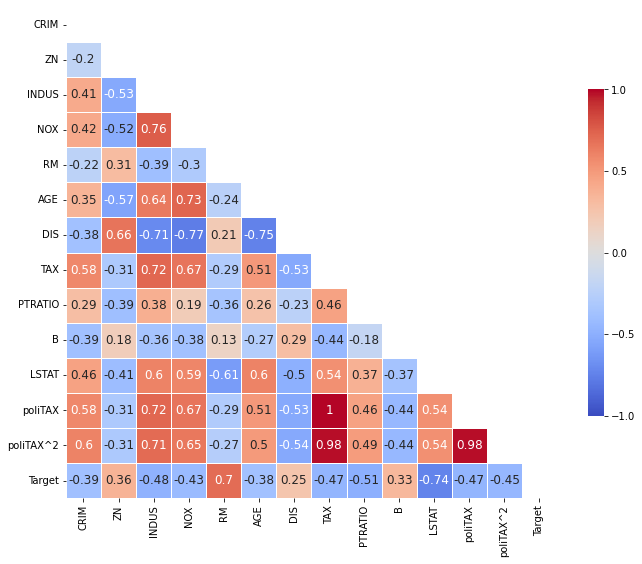

In [52]:
f, ax = plt.subplots(figsize=(11, 15)) 
mask = np.triu(np.ones_like(HousingBoston_transf_final_num.corr())) 
#Aquest mask np.triu treu el mirall (triangle idèntic) al heatmap
heatmap = sns.heatmap(HousingBoston_transf_final_num.corr(method='pearson'), 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

#afegeixo el nom de les columnes
ax.set_yticklabels(HousingBoston_transf_final_num.corr().columns, rotation = 0)
ax.set_xticklabels(HousingBoston_transf_final_num.corr().columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

- Veig que la correlacio amb PTRATIO no ha millorat respecte a la bdd inicial i que la correlació es practicament igual.
- Miro gràficament algunes columnes abans i després per valorar els canvis:


In [53]:
HousingBoston_num = HousingBoston.select_dtypes('float64')
HousingBoston_num

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48,22.0


In [54]:
HousingBoston_transf_final_num

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,poliTAX,poliTAX^2,Target
0,-0.069593,1.44,0.067815,0.314815,0.496612,0.641607,0.285777,0.208015,-1.339286,0.261902,-0.637681,0.208015,0.043270,0.351097
1,-0.063755,0.00,0.242302,0.172840,0.287940,0.782698,0.569789,0.104962,-0.446429,0.261902,-0.221889,0.104962,0.011017,0.050157
2,-0.063760,0.00,0.242302,0.172840,1.323171,0.599382,0.569789,0.104962,-0.446429,0.066675,-0.732634,0.104962,0.011017,1.692790
3,-0.062347,0.00,0.063050,0.150206,1.069783,0.441813,0.924391,0.066794,-0.125000,0.153016,-0.841579,0.066794,0.004461,1.529781
4,-0.052144,0.00,0.063050,0.150206,1.271680,0.528321,0.924391,0.066794,-0.125000,0.261902,-0.602699,0.066794,0.004461,1.880878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.420455,0.386831,0.521003,0.681771,-0.236007,0.164122,0.696429,0.026382,-0.168916,0.164122,0.026936,0.150470
502,-0.058759,0.00,0.420455,0.386831,-0.119919,0.760041,-0.297887,0.164122,0.696429,0.261902,-0.227886,0.164122,0.026936,-0.075235
503,-0.054450,0.00,0.420455,0.386831,1.039973,0.907312,-0.336744,0.164122,0.696429,0.261902,-0.571714,0.164122,0.026936,0.338558
504,-0.040867,0.00,0.420455,0.386831,0.793360,0.889804,-0.265053,0.164122,0.696429,0.096414,-0.487756,0.164122,0.026936,0.100313


In [64]:

def plotsCompareDistri(df1, df2, selected_columns):
    for column in selected_columns:
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        fig.suptitle(f'Compare {column} data after preprocessing')
        sns.boxplot(ax=axes[0], data=df1[column], color='blue')
        sns.boxplot(ax=axes[1], data=df2[column], color='red')       

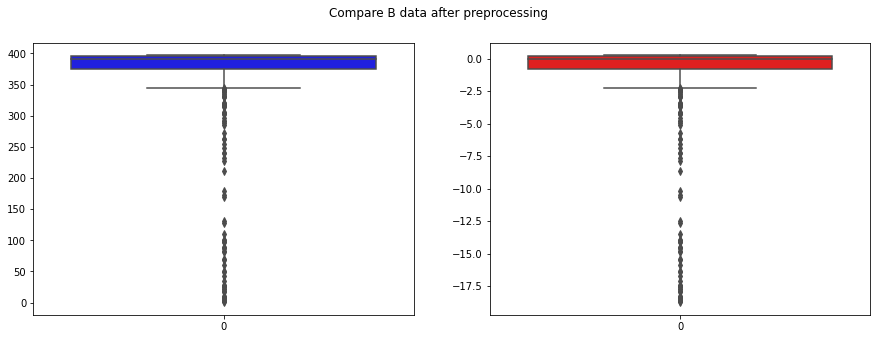

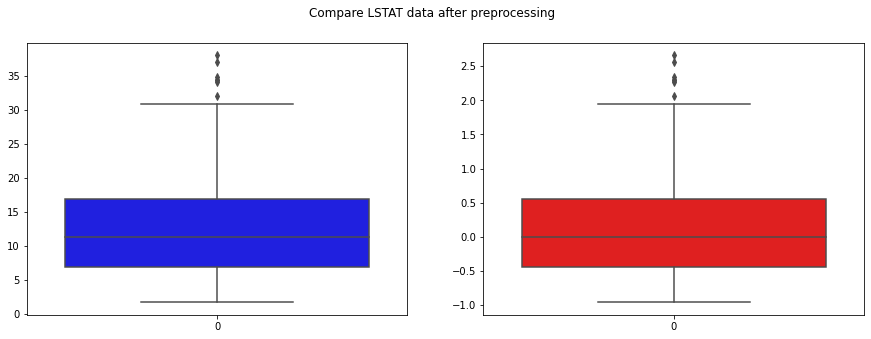

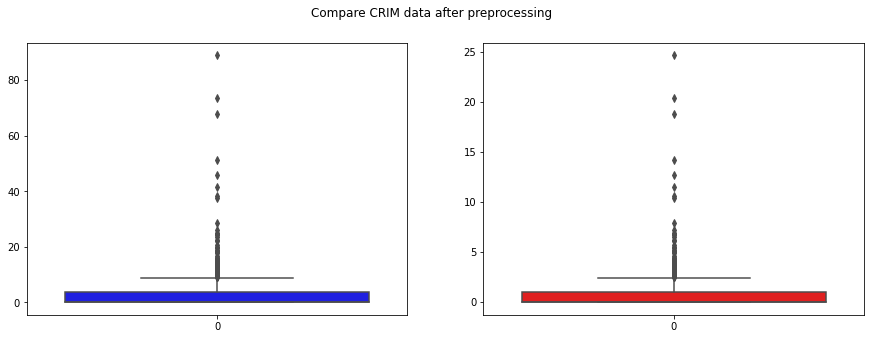

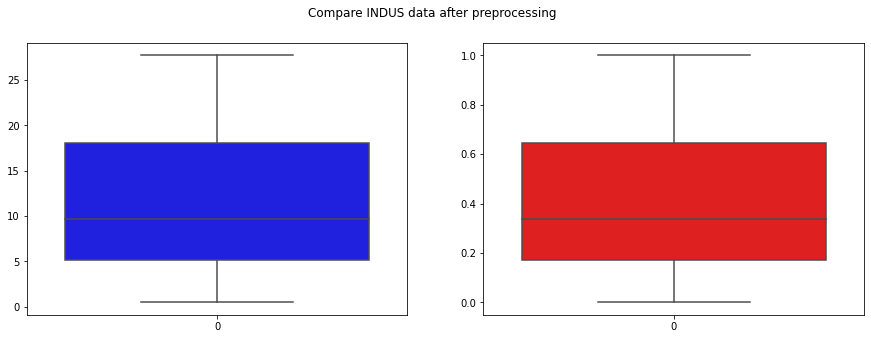

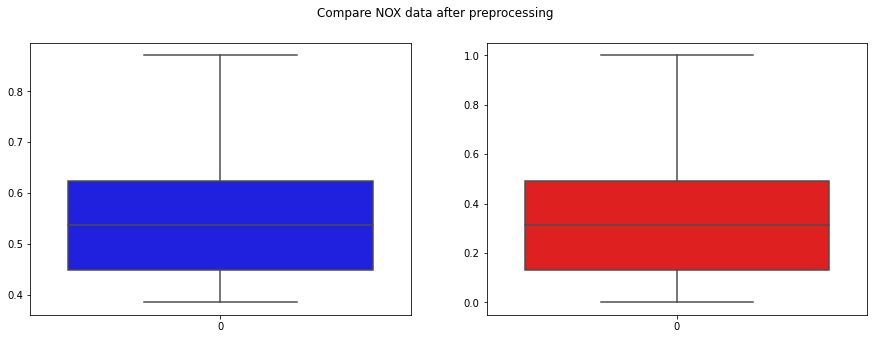

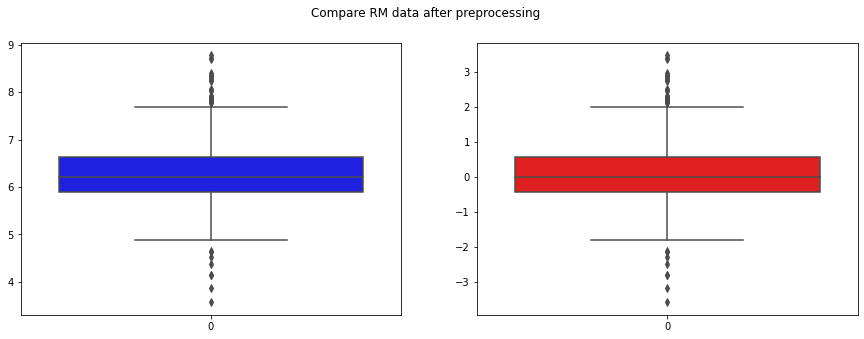

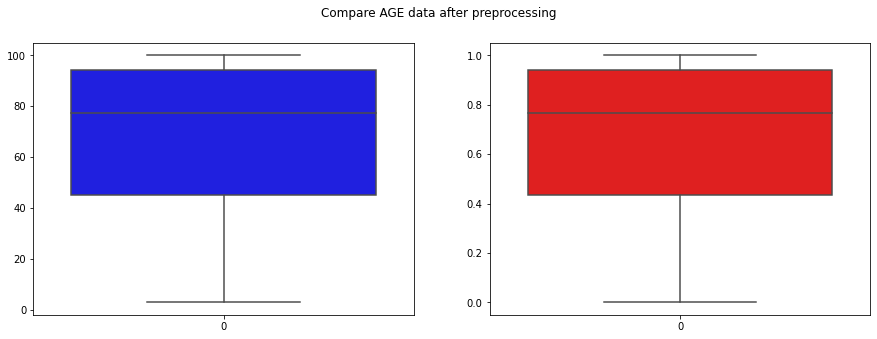

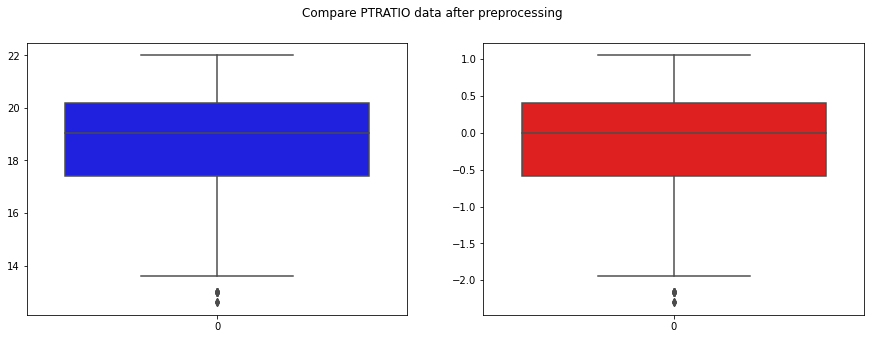

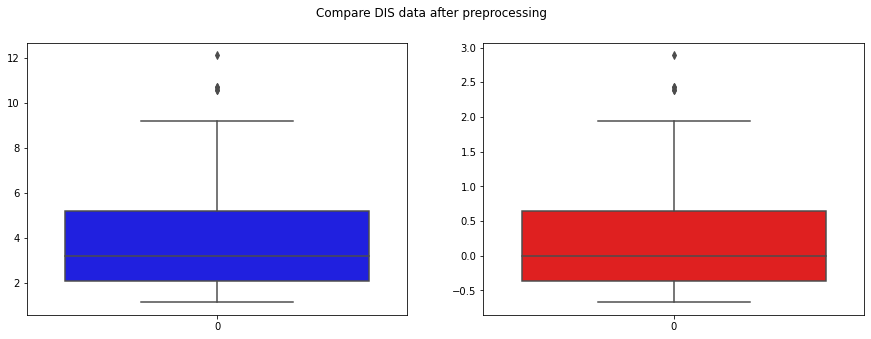

In [69]:
selected_columns = ['B', 'LSTAT', 'CRIM', 'INDUS','NOX','RM','AGE','PTRATIO','DIS']
plotsCompareDistri(HousingBoston_num, HousingBoston_transf_final_num, selected_columns)

Veiem que son molt similars...